In [23]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
import numpy as np
import matplotlib.pyplot as plt

In [24]:
wine_dataset = load_wine()
X,y = wine_dataset.data,wine_dataset.target
X.shape

(178, 13)

In [25]:
mlpr = MLPRegressor(random_state=62,hidden_layer_sizes=(100,100),alpha=0.001)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=62)
X_train.shape

(133, 13)

In [26]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
mlpr.fit(X_train_scaled,y_train)

MLPRegressor(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=62, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [27]:
mlpr.score(X_test_scaled,y_test)

0.82963310258481304

### 特征选择

In [28]:
from sklearn.feature_selection import SelectPercentile

In [29]:
select = SelectPercentile(percentile=50)
select.fit(X_train_scaled,y_train)
x_train_selected = select.transform(X_train_scaled)
x_train_selected.shape

(133, 6)

In [30]:
#查看哪些被忽略掉了
mask = select.get_support()
mask

array([ True, False, False, False, False,  True,  True, False, False,
        True, False,  True,  True], dtype=bool)

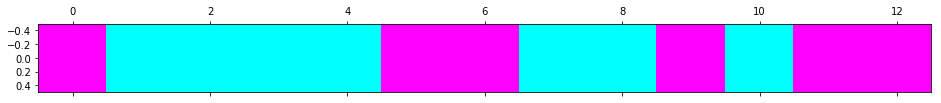

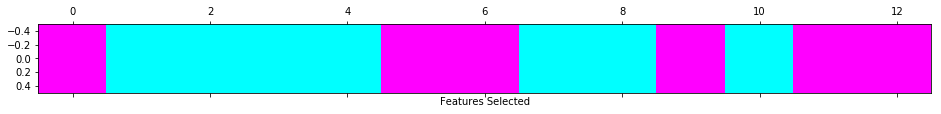

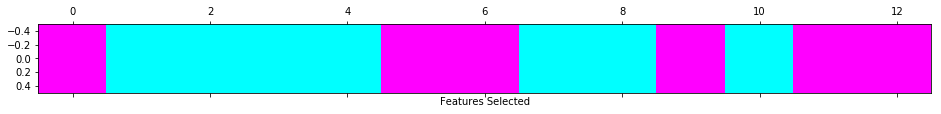

In [34]:
plt.matshow(mask.reshape(1,-1),cmap=plt.cm.cool)
plt.xlabel("Features Selected")
plt.show()

In [36]:
x_test_selected = select.transform(X_test_scaled)

In [38]:
mlpr_sp = MLPRegressor(random_state=62,hidden_layer_sizes=(100,100),alpha=0.001)
mlpr_sp.fit(x_train_selected,y_train)

MLPRegressor(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=62, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [39]:
mlpr_sp.score(x_test_selected,y_test)

0.89788467104699077

### selectFromModel

In [52]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

In [61]:
sfm = SelectFromModel(RandomForestRegressor(n_estimators=100,random_state=38),threshold='median')
sfm.fit(X_train_scaled,y_train)
X_train_sfm = sfm.transform(X_train_scaled)
X_train_sfm.shape

(133, 7)

In [62]:
mask_sfm = sfm.get_support()
mask_sfm

array([ True, False, False, False,  True, False,  True, False, False,
        True,  True,  True,  True], dtype=bool)

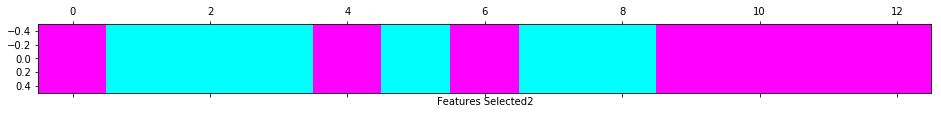

In [63]:
plt.matshow(mask_sfm.reshape(1,-1),cmap=plt.cm.cool)
plt.xlabel("Features Selected2")
plt.show()

In [64]:
X_test_sfm = sfm.transform(X_test_scaled)
mlpr_sfm = MLPRegressor(random_state=62,hidden_layer_sizes=(100,100),alpha=0.001)
mlpr_sfm.fit(X_train_sfm,y_train)

MLPRegressor(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=62, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [65]:
mlpr_sfm.score(X_test_sfm,y_test)

0.82157415136367651

### 迭代式特征选择

In [86]:
from sklearn.feature_selection import RFE

In [87]:
rfe = RFE(RandomForestRegressor(n_estimators=100,random_state=38),n_features_to_select=7)
rfe.fit(X_train_scaled,y_train)
mask = rfe.get_support()
mask

array([ True, False, False, False,  True, False,  True, False, False,
        True,  True,  True,  True], dtype=bool)

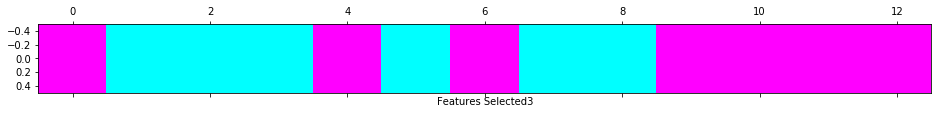

In [82]:
plt.matshow(mask_sfm.reshape(1,-1),cmap=plt.cm.cool)
plt.xlabel("Features Selected3")
plt.show()

In [93]:
##变量初始化
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
##新数据集训练
X_train_rfe = rfe.transform(X_train_scaled)
X_test_rfe = rfe.transform(X_test_scaled)
mlpr_rfe = MLPRegressor(random_state=62,hidden_layer_sizes=(100,100),alpha=0.001)
mlpr_rfe.fit(X_train_rfe,y_train)

MLPRegressor(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=62, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [95]:
mlpr_rfe.score(X_test_rfe,y_test)

0.82157415136367651